In [2]:
import uproot
import awkward as ak
import hist
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep
import sys
sys.path.append('/home/users/hswanson13/tbanalysis/') #stupid python
from utils import plotting as pu
import numpy as np
from importlib import reload

import yaml

reload(pu)
def tb_plot_res_group(tb_plot: pu.TBplot, extra_label="", cmax_hits=None, cmax_res=None, pixel_excludes=None):
    tb_plot.hist_bins['res_shape_comp'] = (20,10,150)
    # tb_plot.resolution_corrected_shape(fill_between=False, extra_label=extra_label)
    
    beam_spot_20 = tb_plot.beam_spot(35, pixel_excludes=pixel_excludes)
    # tb_plot.hit_map(cmax=cmax_hits)
    # tb_plot.hit_map_data[~beam_spot_20] = 0
    # tb_plot.hit_map(cmax=cmax_hits)

    # tb_plot.res_corr_map(cmax=cmax_res)
    # tb_plot.res_corr_map_data[~beam_spot_20] = 0
    # tb_plot.res_corr_map(cmax=cmax_res)

    # for calculation
    return beam_spot_20, tb_plot.res_corr_map_data[beam_spot_20]

In [ ]:
reload(pu)
minus_twenty_degrees = pu.TBplot(
    # # 12011 - 12110 
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_temperatures/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_LP2_20_cubicLM_unbinned",
    load_full_collection=True
)

evs0 = minus_twenty_degrees.events
print(evs0.type.show())
cut1 = evs0.amp > -1
plt.scatter(ak.flatten(evs0.amp[cut1]), ak.flatten(evs0.LP2_40[cut1]))
# minus_twenty_degrees.resolution_shape_comparison()
# minus_twenty_degrees.res_corr_map()
# minus_twenty_degrees.histo1D('dt_corr', pix=(14,11))

# print(minus_twenty_degrees.thresholds)
# minus_twenty_degrees.hit_map()
#minus_twenty_degrees.histo1D('dt_corr', pix=(14,11))

# minus_twenty_degrees.timewalk_scatter(pix=(14,11))
# minus_twenty_bs, minus_twenty_resolutions = tb_plot_res_group(
#     minus_twenty_degrees, 
#     extra_label="-20.6C", 
#     cmax_res=140,
#     cmax_hits=5300,
#     pixel_excludes=[(15,0)]
# )

In [ ]:
reload(pu)
refactored = pu.TBplot(
"/home/etl/Test_Stand/tbanalysis/output_analysis_data/rereco_test1/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned",
load_full_collection=True
)
evs = refactored.events


toff = evs.mcp_trigger_offset - evs.clock_trigger_offset
cut = evs.mcp_timestamp > -1
toff = toff[cut]
plt.scatter(ak.flatten(evs0.amp[cut1]), ak.flatten(evs0.trigger[cut1]))
plt.scatter(ak.flatten(evs.mcp_amplitude[cut]*-1000), ak.flatten(evs.mcp_timestamp[cut]-toff) )

# refactored.resolution_shape_comparison()
# refactored.res_corr_map()
# print(refactored.events.dt)
# refactored.histo1D('dt_corr', pix=(14,11))

# print(refactored.events)
# refactored.hit_map()
# refactored.histo1D('dt_corr', pix=(14,11))


In [ ]:
reload(pu)
refactored_toff = pu.TBplot(
"/home/etl/Test_Stand/tbanalysis/output_analysis_data/rereco_test1_toff_mcp_m_clk/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned",
#load_full_collection=True
)
# evs = refactored.events

# cut = evs.mcp_timestamp > -1
# plt.scatter(ak.flatten(evs.mcp_amplitude[cut]), ak.flatten(evs.mcp_timestamp[cut]))

refactored_toff.resolution_shape_comparison()
refactored_toff.res_corr_map()
refactored_toff.histo1D('dt_corr', pix=(14,11))


In [ ]:
reload(pu)
refactored_toff_clk_m_mcp = pu.TBplot(
"/home/etl/Test_Stand/tbanalysis/output_analysis_data/rereco_test1_toff_clk_m_mcp/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned",
#load_full_collection=True
)
# evs = refactored.events

# cut = evs.mcp_timestamp > -1
# plt.scatter(ak.flatten(evs.mcp_amplitude[cut]), ak.flatten(evs.mcp_timestamp[cut]))

refactored_toff_clk_m_mcp.resolution_shape_comparison()
refactored_toff_clk_m_mcp.res_corr_map()
refactored_toff_clk_m_mcp.histo1D('dt_corr', pix=(14,11))


In [ ]:


refac_amp = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/rereco_test2_amp_check/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned"
 #, load_full_collection=True
)


refac_amp.resolution_shape_comparison()
refac_amp.res_corr_map()
refac_amp.histo1D('dt_corr', pix=(14,11))

# ev_amp = refac_amp.events
# toff2 = ev_amp.mcp_trigger_offset - ev_amp.clock_trigger_offset
# cut2 = ev_amp.mcp_timestamp > -1
# toff2 = toff2[cut2]
# plt.scatter(ak.flatten(evs0.amp[cut1]), ak.flatten(evs0.LP2_40[cut1])*10**9, label='Old')
# plt.scatter(ak.flatten(ev_amp.mcp_amplitude[cut2]*-1000), ak.flatten(ev_amp.mcp_timestamp[cut2]), label='Refactored' )

# plt.title('Comparing MCP Amplitude vs MCP Timestamp for Old and Refactored')
# plt.xlabel('mV')
# plt.ylabel('nanoseconds')
# plt.legend()


In [ ]:


old_40 = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/old_amp_40_check/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_LP2_40_cubicLM_unbinned",
)


old_40.resolution_shape_comparison()
old_40.res_corr_map()
old_40.histo1D('dt_corr', pix=(14,11))


In [ ]:
all_amp_refac = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/rereco_test3_no_toffset/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned",
    load_full_collection=False
)

all_amp_refac.resolution_shape_comparison()
all_amp_refac.res_corr_map()
all_amp_refac.histo1D('dt_corr', pix=(14,11))


In [ ]:
retry_ref = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/rereco_test4_mcp_m_clk/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned"
    ,load_full_collection=False
)

retry_ref.hist_bins['res_shape_comp'] = (30,0,150)
retry_ref.resolution_shape_comparison()
retry_ref.res_corr_map()
retry_ref.histo1D('dt_corr', pix=(14,11))

In [ ]:
data = uproot.open("/home/etl/Test_Stand/ETL_TestingDAQ/rereco_data2/run_12011.root")["pulse"].arrays()
full_data = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/rereco_test3_no_toffset/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned",
    load_full_collection=False
)
fevs = full_data.events
print(fevs.toa)
i = 6,#30
y = data.mcp_volts[i]
x = data.mcp_seconds[i]*10**9

plt.axvline(0, color='black')

# toa = fevs.toa[i][0]
# clock = fevs.clock[i]
# mcp = data.mcp_timestamp[i]
# plt.axvline(toa, label='toa', color='blue')
# plt.axvline(clock, label='clock', color='purple')
# plt.axvline(mcp, label='mcp', color='red')
# plt.axvline(toa + clock - mcp, label='toa + clock - mcp', color='g')

# mask=(x<1) & (x>-1)
# x, y = x[mask], y[mask]
plt.scatter(x,y)
plt.xticks(np.arange(-25,25+5,5))
plt.legend()

In [2]:
import os

data_path = "/home/etl/Test_Stand/ETL_TestingDAQ/rereco_data2/"
mcp_trig_offsets = []
clk_trig_offsets = []
for f in os.listdir(data_path):
    d = uproot.open(data_path+f)["pulse"].arrays()
    mcp_trig_offsets += d.mcp_trigger_offset.to_list()
    clk_trig_offsets += d.clock_trigger_offset.to_list()



In [ ]:
# Plot histograms
fig, axs = plt.subplots(1, 1, figsize=(12, 5))

bins = np.linspace(-25.075, -24.975, 100)

mcp_trig_offsets_arr = np.array(mcp_trig_offsets)*10**9
plt.hist(np.clip(mcp_trig_offsets_arr, bins[0], bins[-1]), 
         bins=bins,  
         label=f"mcp channel trigger offset")

clk_trig_offsets_arr = np.array(clk_trig_offsets)*10**9
plt.hist(np.clip(clk_trig_offsets_arr, bins[0], bins[-1]), 
         bins=bins,  
         label=f"clock channel trigger offset")

plt.xticks(np.arange(-25.075,-24.975,0.010))
plt.legend()
plt.title('Trigger Offsets for 2 Channels')
plt.ylabel('counts')
plt.xlabel('nanoseconds')

print(np.max(mcp_trig_offsets_arr) - np.min(clk_trig_offsets_arr))

In [ ]:
moved_refactor = pu.TBplot(
"/home/etl/Test_Stand/tbanalysis/output_analysis_data/refactor_clk_removed/start_12011_stop_12110_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_250_file_from_SPS_Oct_trigger_rate_5kHz_ambient_air_temp_C_-20.6_etroc_adc_temp_2374_cubicLM_unbinned"
)

#moved_refactor.hist_bins['res_shape_comp'] = (40,0,150)
moved_refactor.resolution_shape_comparison()
moved_refactor.res_corr_map()
moved_refactor.histo1D('dt_corr', pix=(14,11))

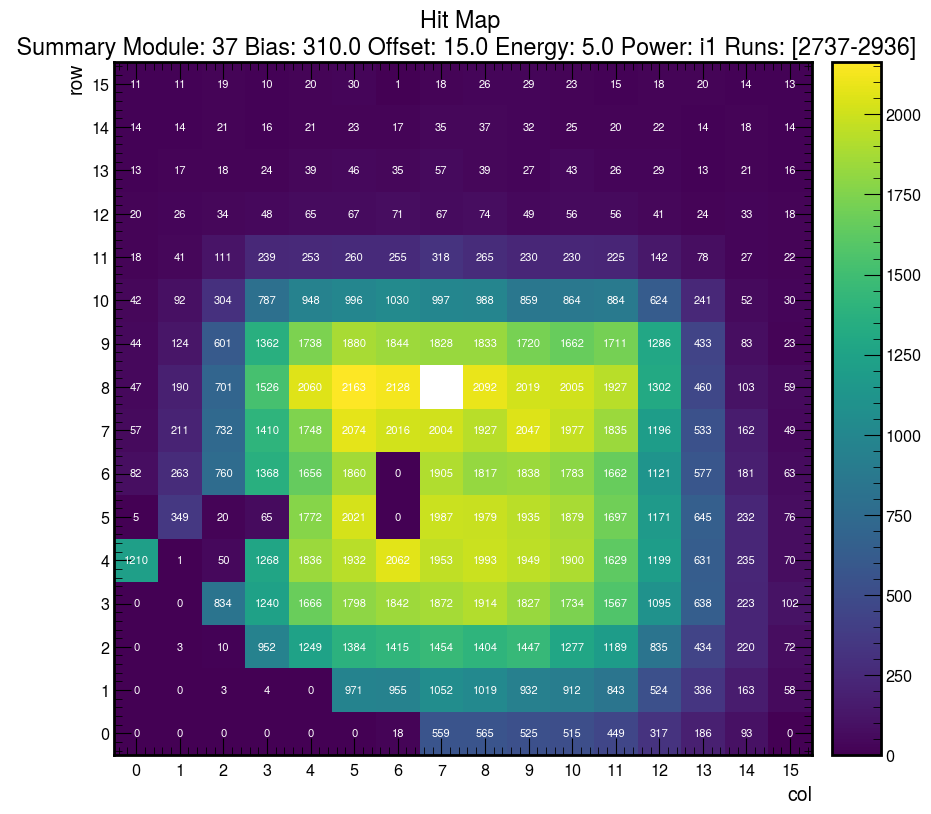

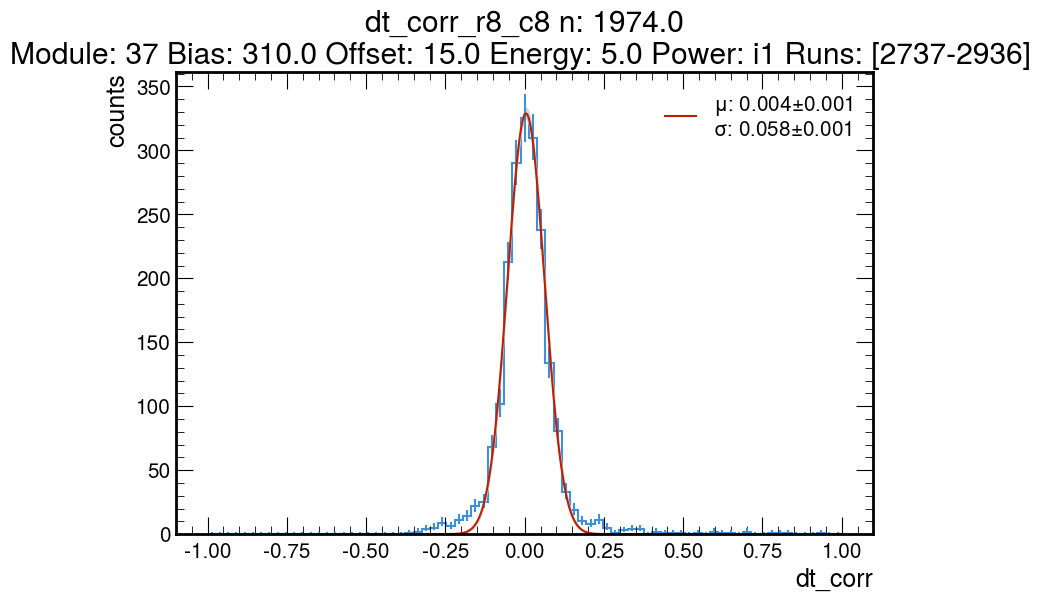

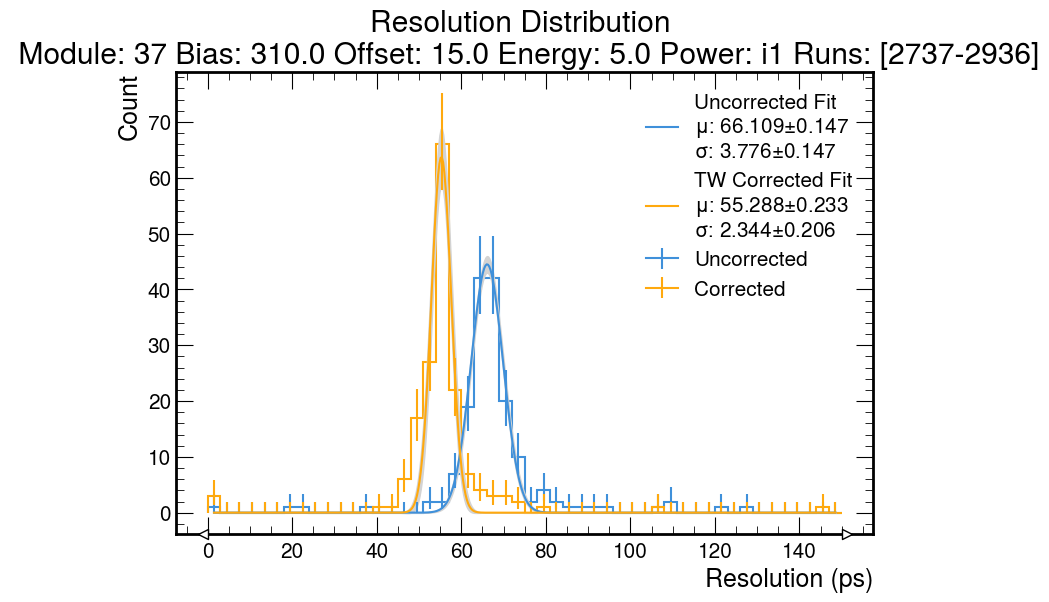

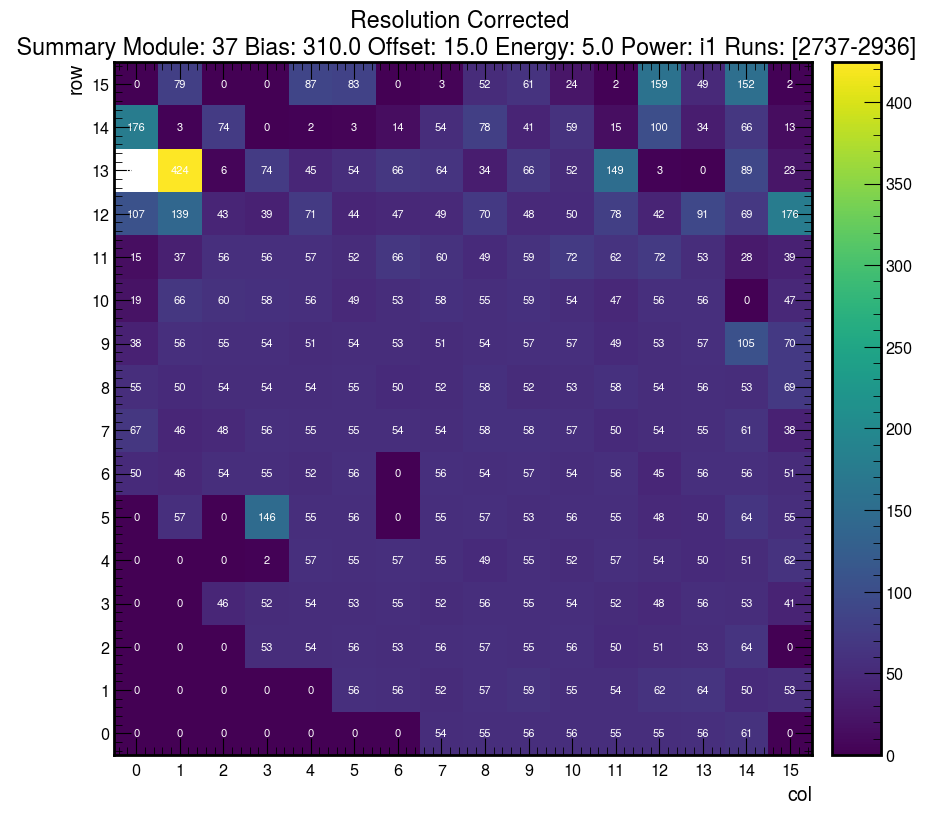

In [10]:
# Aram refactor:

aref = pu.TBplot(
    #"/home/users/hswanson13/tbanalysis/output_analysis_data/aramRereco_Old/start_2737_stop_2936_bias_310_offset_15.0_energy_5.0_power_i1_file_from_DESY_module_37_cubicLM_unbinned", 
    # Retry, HOPE
    "/home/users/hswanson13/tbanalysis/output_analysis_data/aramRereco_OldRetry/start_2737_stop_2936_bias_310_offset_15.0_energy_5.0_power_i1_file_from_DESY_module_37_cubicLM_unbinned",
    load_full_collection=False
)

aref.hit_map()
aref.histo1D('dt_corr', pix=(8,8))
aref.resolution_shape_comparison()
aref.res_corr_map()

# evs = aref.events
# cut = evs.mcp_timestamp > -999999
# plt.scatter(evs.mcp_amplitude[cut]*-1000, evs.mcp_timestamp[cut], label='new')
# plt.xlabel('MCP Amplitude')
# plt.ylabel('MCP Timestamps')


# old_aram = uproot.open("/ceph/cms/store/user/iareed/ETL/DESY_Mar24/run_2800.root")["pulse"].arrays()
# plt.scatter(old_aram.amp[:,1], old_aram.LP2_40[:,1]*1e9, label="old")

# plt.legend()

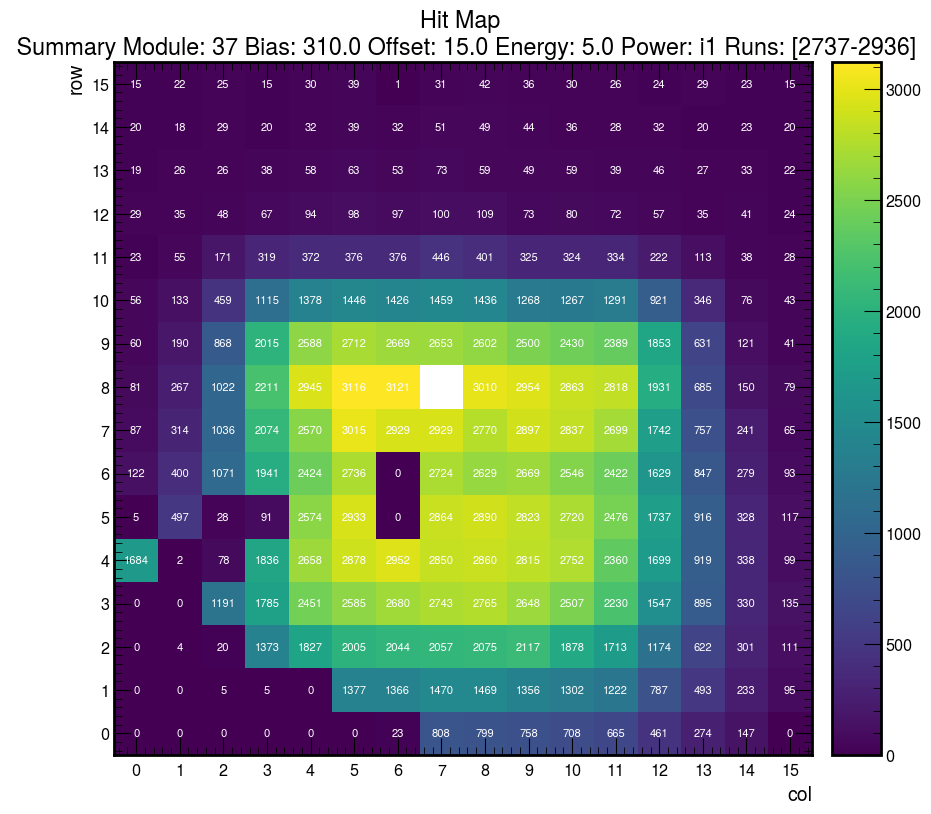

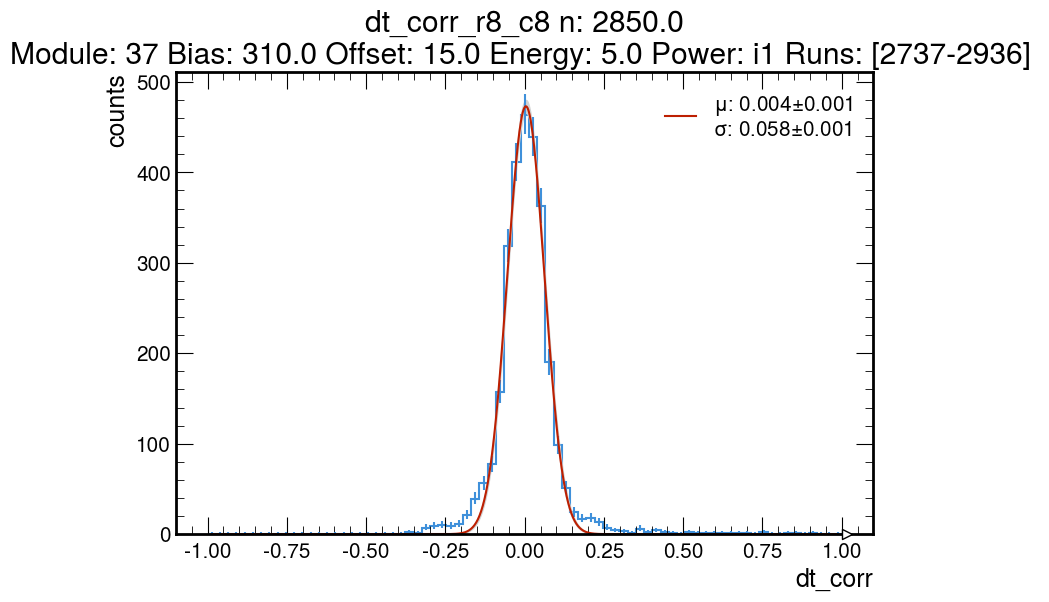

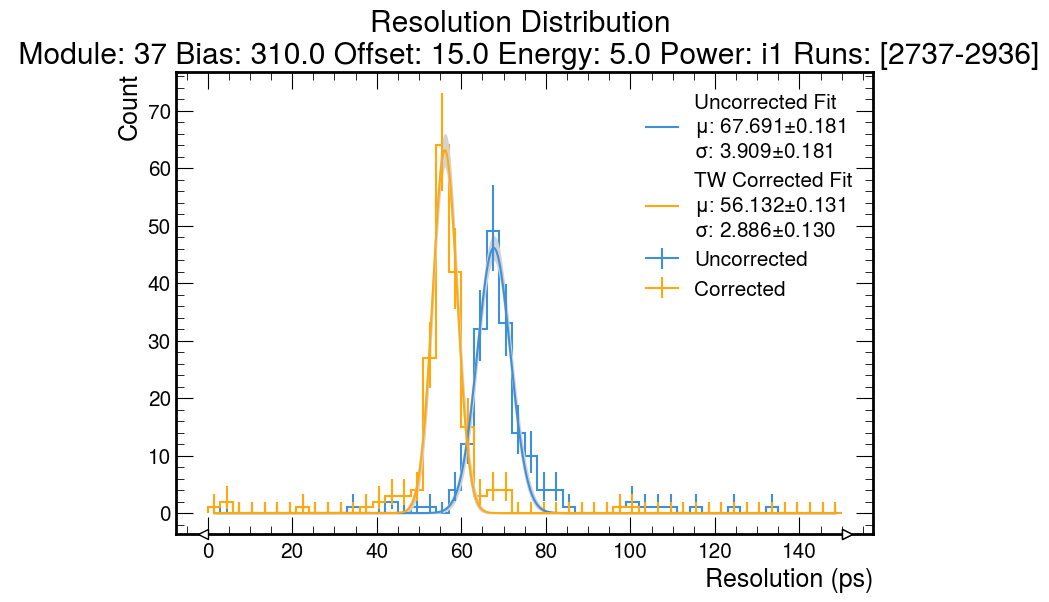

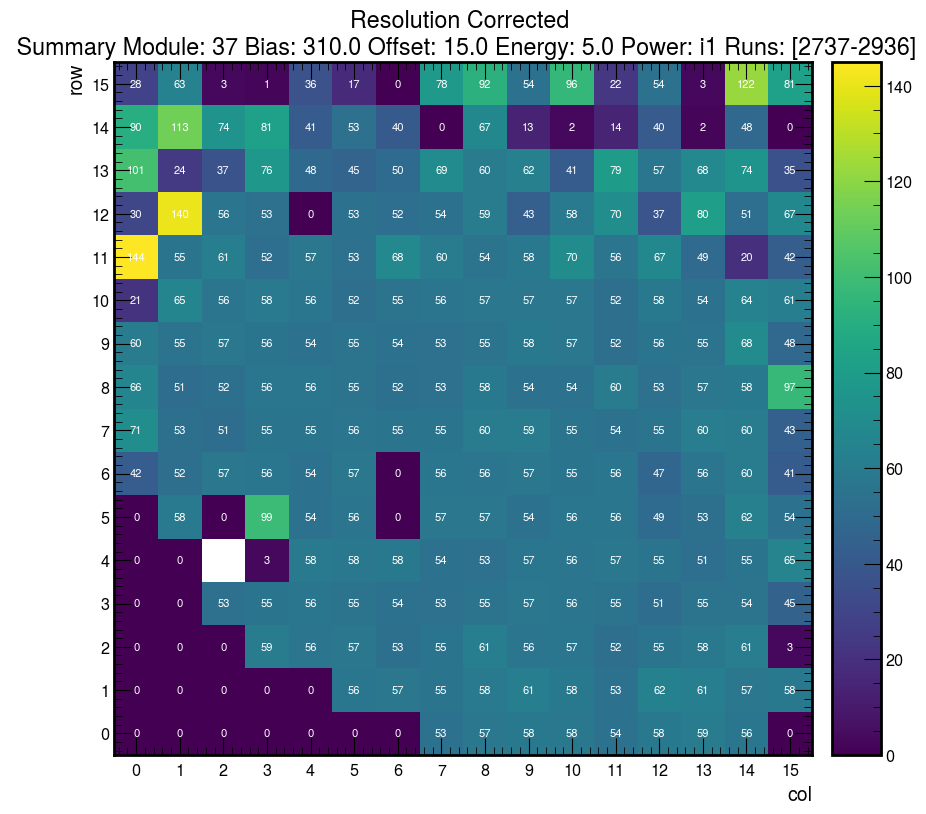

In [14]:
from legacy.utils import plotting as plu

old_aram_vals = plu.TBplot(
    "/home/users/hswanson13/tbanalysis/legacy/output_analysis_data/aramRereco_Old/start_2737_stop_2936_bias_310_offset_15.0_energy_5.0_power_i1_file_from_DESY_module_37_LP2_20_cubicLM_unbinned"
)

old_aram_vals.hit_map()
old_aram_vals.histo1D('dt_corr', pix=(8,8))
old_aram_vals.resolution_shape_comparison()
old_aram_vals.res_corr_map()
